In [1]:
import numpy as np
import pandas as pd

# Generate random data for testing
np.random.seed(0)  # for reproducibility
num_samples = 100
num_features = 2

# Generate random data points
data = np.random.rand(num_samples, num_features)

# Convert to DataFrame
df = pd.DataFrame(data, columns=['X', 'Y'])

# Save DataFrame to CSV file
df.to_csv('test_data.csv', index=False)

print("CSV file 'test_data.csv' has been generated successfully.")


CSV file 'test_data.csv' has been generated successfully.


K-means labels:
[2 2 0 0 2 2 2 1 0 2 2 0 0 0 1 0 0 0 2 2 0 1 2 1 1 1 1 1 1 1 1 1 0 1 1 2 2
 1 1 1 0 0 1 1 2 0 0 1 1 1 1 2 0 2 0 0 1 2 2 2 2 2 0 0 1 2 0 2 2 2 2 0 2 0
 2 0 0 0 2 1 2 2 2 0 1 1 1 1 0 1 0 1 2 2 1 1 0 2 1 0]
EM labels:
[2 2 2 2 2 2 2 0 1 2 2 2 1 1 2 1 2 1 2 2 2 0 2 0 2 2 0 0 2 0 0 0 1 0 0 2 2
 0 0 0 2 1 2 0 2 2 1 0 0 0 2 2 1 2 1 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1
 2 1 1 1 2 0 2 2 2 1 0 0 0 2 2 0 1 2 2 2 2 0 1 2 1 1]


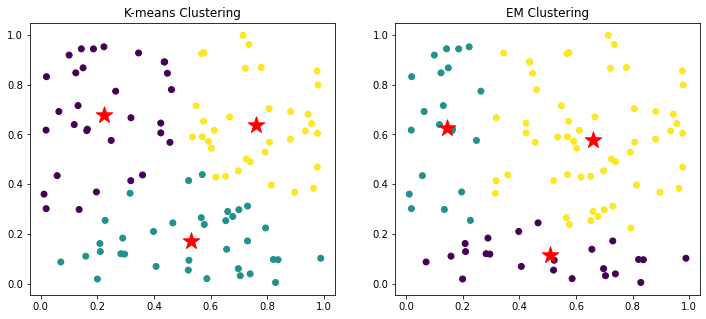

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Load the dataset from CSV file
data = pd.read_csv('test_data.csv')

# Visualize the dataset if needed
# plt.scatter(data['X'], data['Y'])
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

# Convert the dataset to numpy array
X = data.values

# Number of clusters
k = 3

# K-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_

# EM clustering
em = GaussianMixture(n_components=k)
em.fit(X)
em_labels = em.predict(X)
em_centers = em.means_

# Compare clustering results
print("K-means labels:")
print(kmeans_labels)
print("EM labels:")
print(em_labels)

# Visualize clustering results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], marker='*', s=300, c='r')
plt.title('K-means Clustering')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=em_labels, cmap='viridis')
plt.scatter(em_centers[:, 0], em_centers[:, 1], marker='*', s=300, c='r')
plt.title('EM Clustering')

plt.show()


In [3]:
from sklearn.metrics import silhouette_score

# Silhouette Score for K-means
kmeans_silhouette = silhouette_score(X, kmeans_labels)
print(f"K-means Silhouette Score: {kmeans_silhouette}")

# Silhouette Score for EM (GMM)
em_silhouette = silhouette_score(X, em_labels)
print(f"EM (GMM) Silhouette Score: {em_silhouette}")

K-means Silhouette Score: 0.3776151048889095
EM (GMM) Silhouette Score: 0.314996718073097


The Silhouette Score measures how similar a data point is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to 1, with higher values indicating better-defined clusters.

K-means Silhouette Score: 0.3776

This score suggests that the clustering is moderately good. Points are closer to their own cluster center than to other cluster centers, but the clusters are not very well separated.


EM (GMM) Silhouette Score: 0.3150

This score is slightly lower than the K-means score, indicating that the clusters formed by GMM are less well-defined compared to those formed by K-means.